# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Zidan Alif Oktavian
- **Email:** m.zidanalif123@gmail.com (Dicoding) || m284b4ky3135@bangkit.academy (Bangkit)
- **ID Dicoding:** emzidd

## Menentukan Pertanyaan Bisnis

- Apa strategi promosi yang dapat meningkatkan penggunaan bike-sharing pada jam-jam tertentu (misalnya jam sibuk atau akhir pekan), berdasarkan pola penggunaan yang sudah ada?
- Bagaimana tren penggunaan layanan bike-sharing selama periode satu tahun terakhir, dan bagaimana faktor-faktor seperti cuaca atau hari libur memengaruhi tingkat penggunaan secara bulanan?
- Bagaimana distribusi penyewaan sepeda per jam, per hari dalam seminggu, dan per bulan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bike-sharing-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F130897%2F312329%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241004%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241004T151119Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D49306c40757c385e6bf9fd532756110902157ca12fa0077a637c006ba84bfe8f62dee3eb5c1f06acf7fbc6ca5b30bfdf120e4e75018d3b865d99e88a12c0427a9fb1710b992effa8ba8dea87fcf360526aa233cc8cc6f415ff0765c4892a26dec6d822579416a1efc07e134cb5239d83da20ca286eb9ff982fbe00ecd06d2565fbef3740e98719d521a1fa776292d6a11d23fa6c65cc0630997f2fbcdd3283d642e855823418cbfafdb457ff44dad9d16c883fd43107b4cbfddc7b24c2b8da68b54deba5edd6aa12e64006dd9357db5d4b776a55610723cced2d700aa5132054f1ac363c7d795e200167b571cc7265b56a87ace2b3455f5aa0b3636d6976dcb4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 293197 bytes downloaded
Downloaded and uncompressed: bike-sharing-dataset
Data source import complete.


In [9]:
#Import necessary libraries
#for DA and array processing
import pandas as pd
import numpy as np

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot

#For Statistical modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

In [10]:
# Gathering data
df = pd.read_csv('/kaggle/input/bike-sharing-dataset/hour.csv')
# Show dataset shape
df.shape
# Show the first five samples in the dataset
df.head().style.background_gradient(cmap='Greys')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [11]:
#Exploring data frame,identifying Potential Errors and understanding the datatypes
pd.set_option('display.max_columns', None)
def data_overview(df, head=5):
    print(" SHAPE ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" HEAD ".center(125,'-'))
    print(df.head(3))
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)

data_overview(df)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:17379
Columns:17
------------------------------------------------------- MISSING VALUES ------------------------------------------------------
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------
0
------------------------------------------------------------ HEAD -----------------------------------------------------------
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1 

**Insight:**
- xxx
- xxx

### Cleaning Data

In [12]:
#Checking ouliers in Target varibale "cnt".

Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
outliers.style.background_gradient(cmap='Greys')

In [13]:
#removing outliers
df = df[(df['cnt'] >= lower_bound) & (df['cnt'] <= upper_bound)]
print("shape after outliers removal :",df.shape)

shape after outliers removal : (16874, 17)


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [31]:
# Converting the 'dteday' column to datetime format for better time-based analysis
df['dteday'] = pd.to_datetime(df['dteday'])

# Verifying the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   yr          16874 non-null  int64         
 3   mnth        16874 non-null  int64         
 4   hr          16874 non-null  int64         
 5   holiday     16874 non-null  int64         
 6   weekday     16874 non-null  int64         
 7   workingday  16874 non-null  int64         
 8   weathersit  16874 non-null  int64         
 9   temp        16874 non-null  float64       
 10  atemp       16874 non-null  float64       
 11  hum         16874 non-null  float64       
 12  windspeed   16874 non-null  float64       
 13  casual      16874 non-null  int64         
 14  registered  16874 non-null  int64         
 15  cnt         16874 non-null  int64         
 16  season_1    16874 non-null 

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

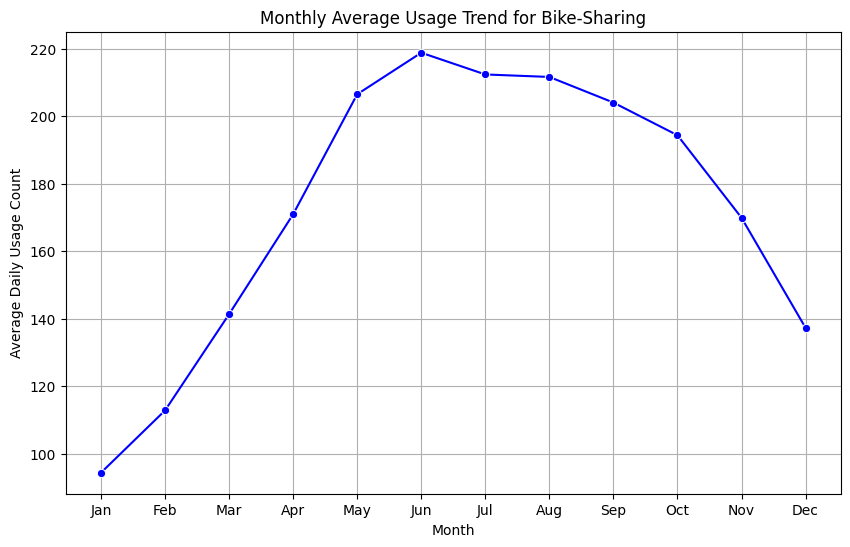

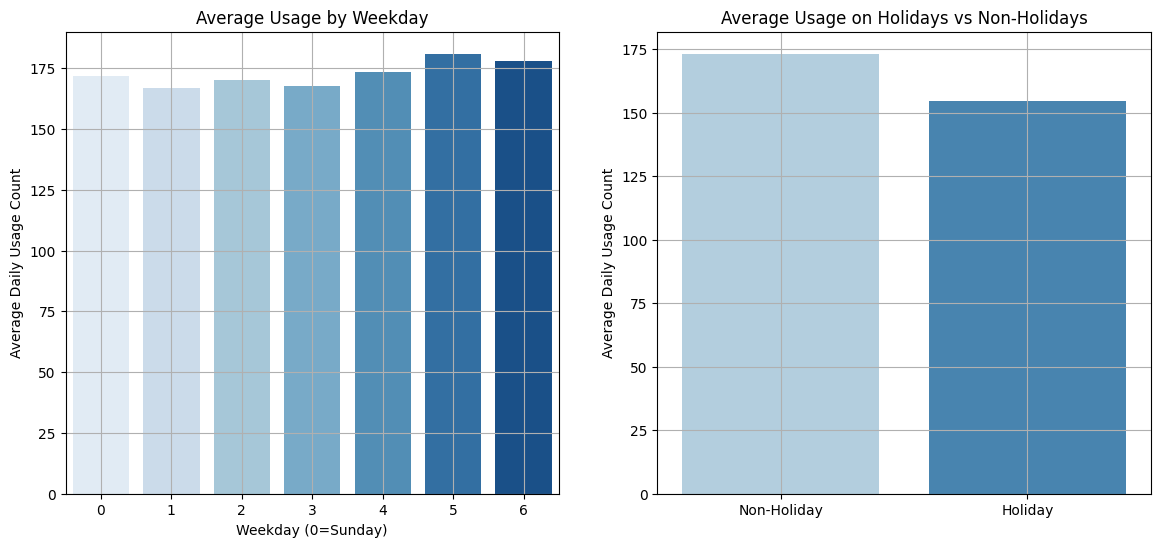

<Figure size 1200x600 with 0 Axes>

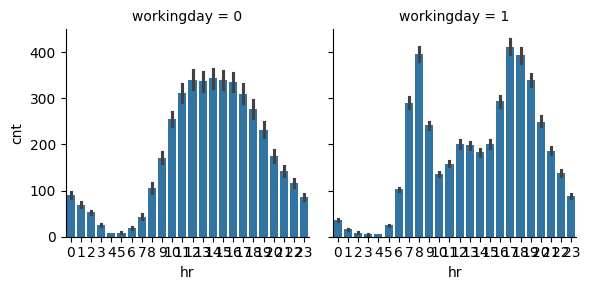

In [21]:
# Aggregating the total daily usage (cnt) by month to observe monthly trends
monthly_usage = df.groupby('mnth')['cnt'].mean()

# Plotting the monthly usage trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_usage, marker='o', color='b')
plt.title('Monthly Average Usage Trend for Bike-Sharing')
plt.xlabel('Month')
plt.ylabel('Average Daily Usage Count')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Aggregating the usage based on weekday and holiday to understand patterns
weekday_usage = df.groupby('weekday')['cnt'].mean()
holiday_usage = df.groupby('holiday')['cnt'].mean()

# Plotting weekday vs. holiday usage trend
plt.figure(figsize=(14, 6))

# Weekday usage
plt.subplot(1, 2, 1)
sns.barplot(x=weekday_usage.index, y=weekday_usage.values, palette="Blues")
plt.title('Average Usage by Weekday')
plt.xlabel('Weekday (0=Sunday)')
plt.ylabel('Average Daily Usage Count')
plt.grid(True)

# Holiday vs Non-holiday usage
plt.subplot(1, 2, 2)
sns.barplot(x=['Non-Holiday', 'Holiday'], y=holiday_usage.values, palette="Blues")
plt.title('Average Usage on Holidays vs Non-Holidays')
plt.ylabel('Average Daily Usage Count')
plt.grid(True)

plt.figure(figsize=(12,6))
d = sns.FacetGrid(df, col="workingday")
d. map(sns.barplot, "hr", "cnt")

plt.tight_layout()
plt.show()


### Pertanyaan 2:

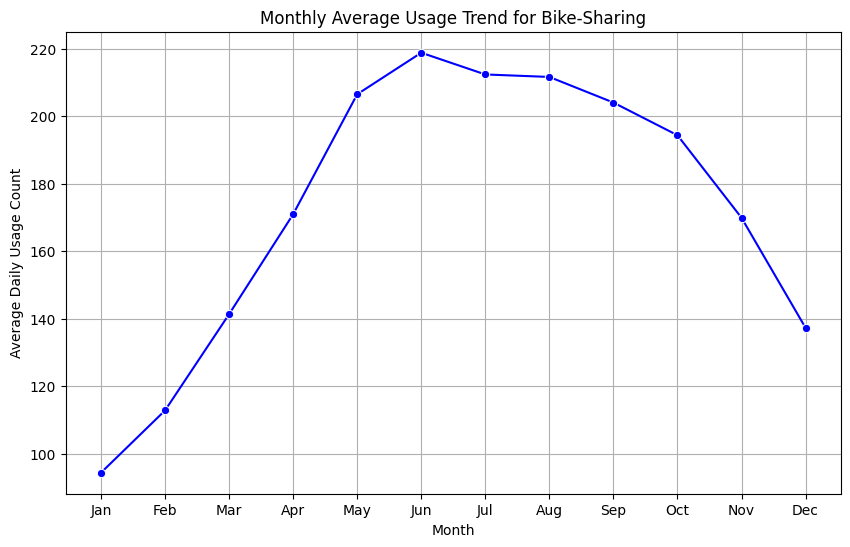

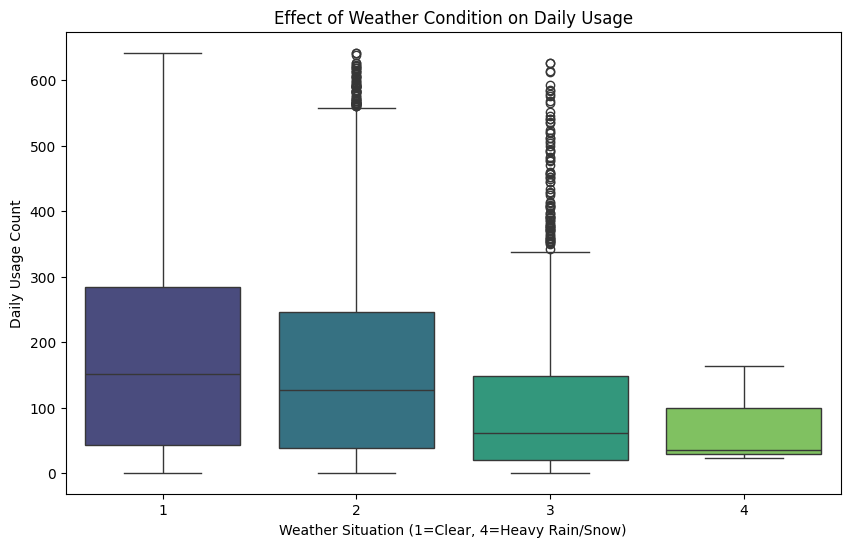

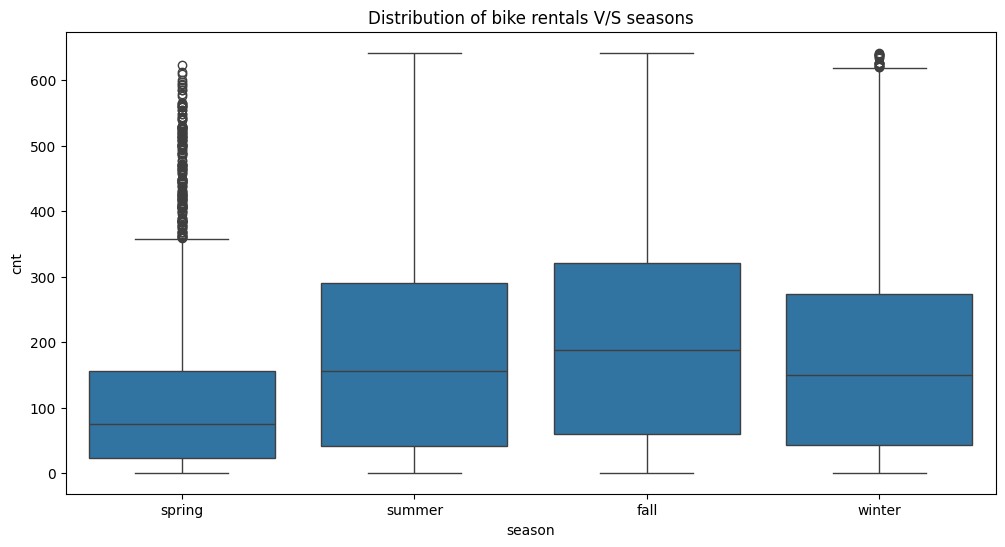

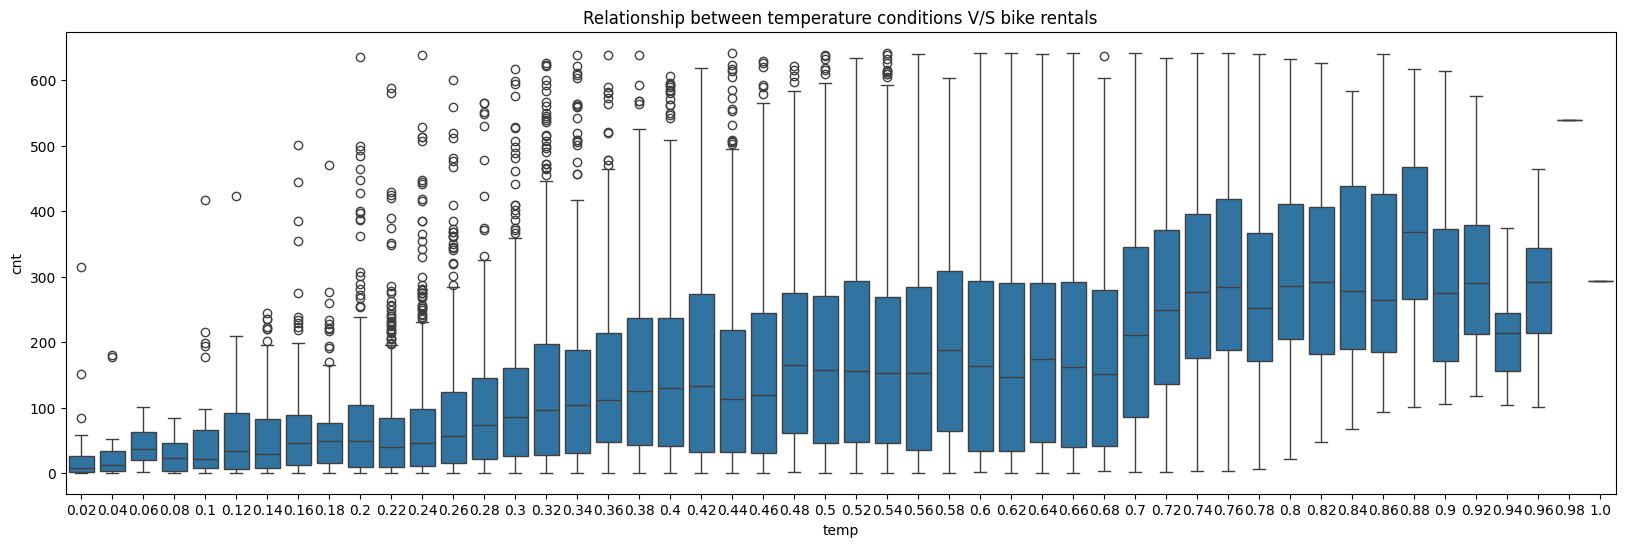

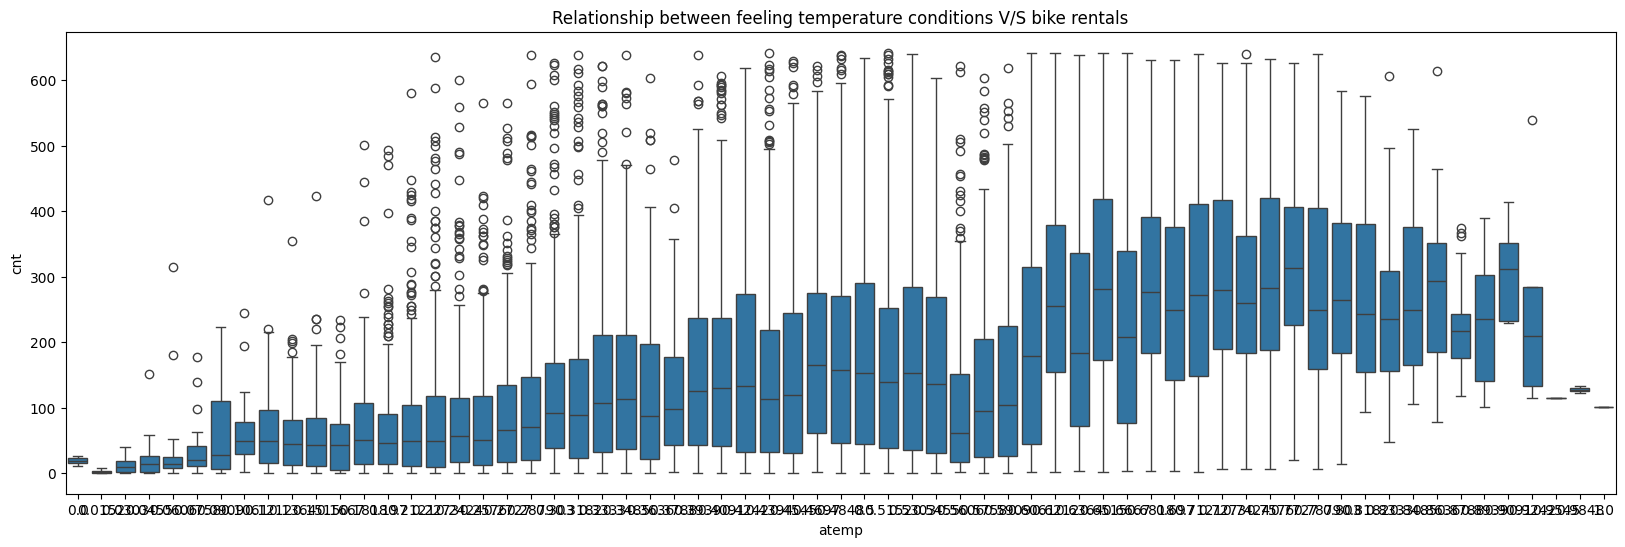

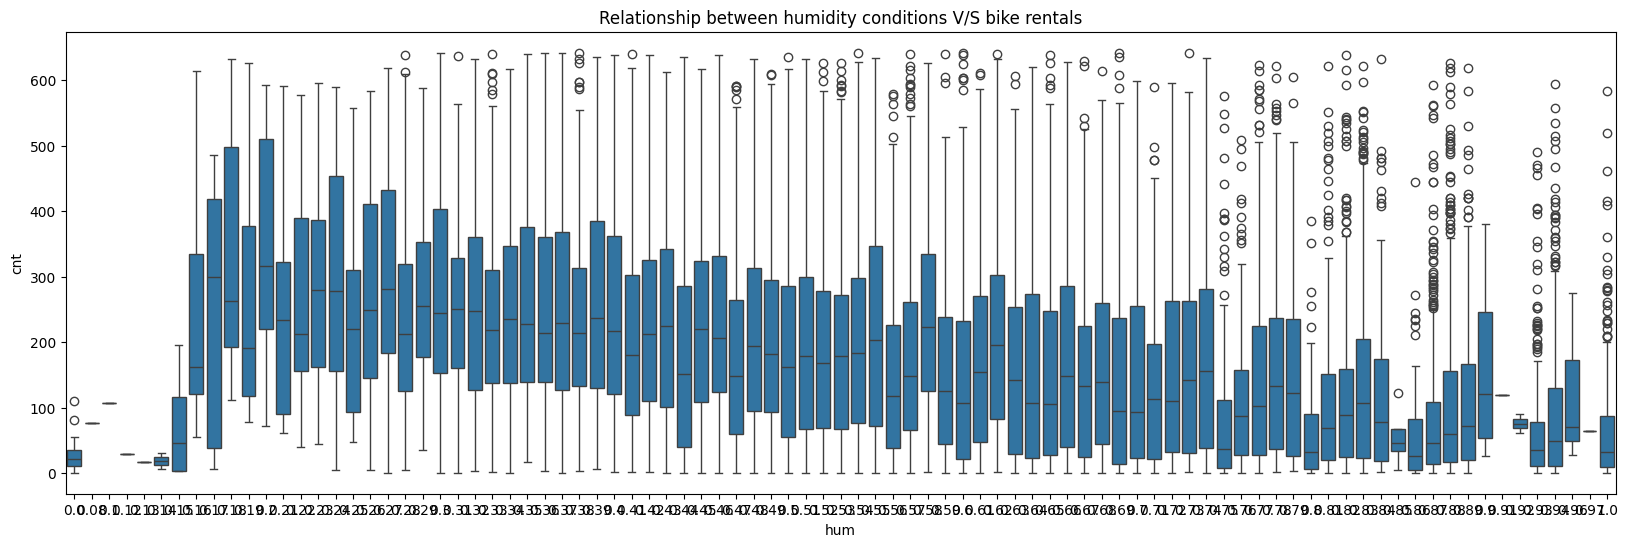

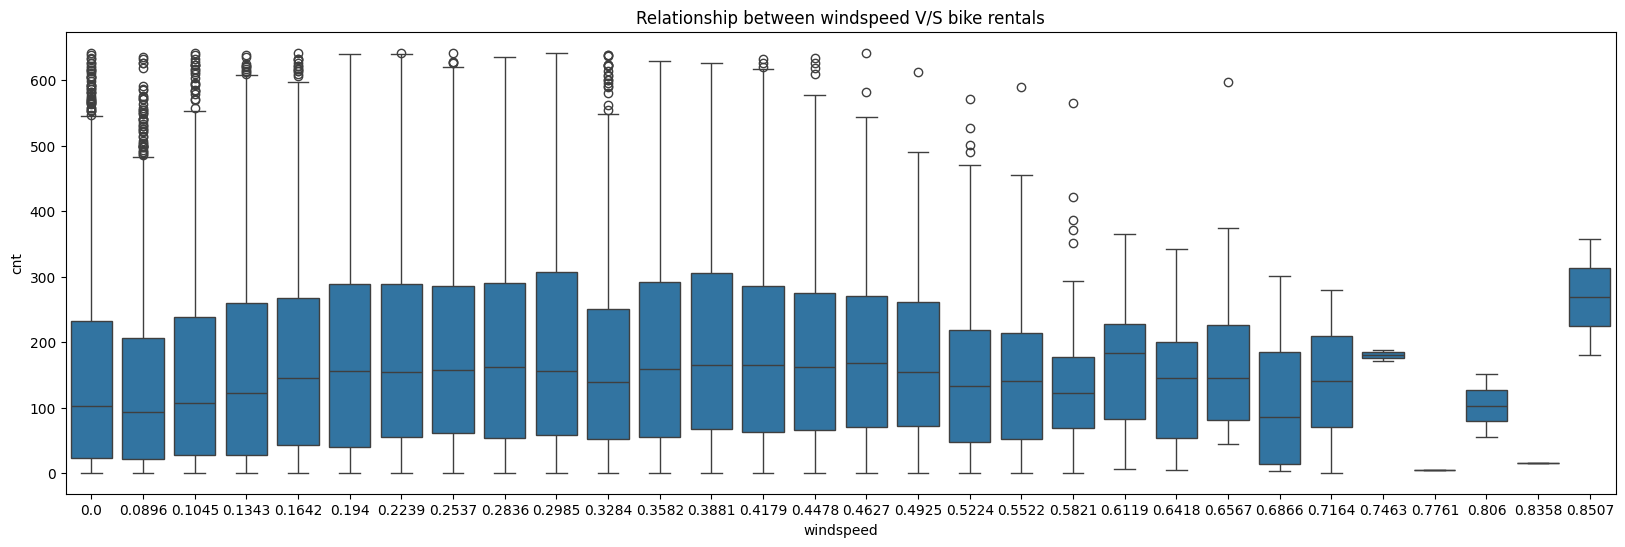

In [26]:
# Trend Analysis: Monthly Usage Trend
monthly_usage = df.groupby('mnth')['cnt'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_usage, marker='o', color='b')
plt.title('Monthly Average Usage Trend for Bike-Sharing')
plt.xlabel('Month')
plt.ylabel('Average Daily Usage Count')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Weather Impact Analysis: Usage by Weather, temp, atemp, humidity, windspeed Situation
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df, palette='viridis')
plt.xlabel("Weather Situation (1=Clear, 4=Heavy Rain/Snow)")
plt.ylabel("Daily Usage Count")
plt.title("Effect of Weather Condition on Daily Usage")
plt.show()
df['season'] = df[['season_1', 'season_2', 'season_3', 'season_4']].idxmax(axis=1)
df['season'] = df['season'].map({'season_1': 'spring', 'season_2': 'summer', 'season_3': 'fall', 'season_4': 'winter'})
plt.figure(figsize=(12,6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Distribution of bike rentals V/S seasons')
plt.show()

plt.figure(figsize=(20,6))
sns.boxplot(x='temp', y='cnt', data=df)
plt.title('Relationship between temperature conditions V/S bike rentals')
plt.show()

plt.figure(figsize=(20,6))
sns.boxplot(x='atemp', y='cnt', data=df)
plt.title('Relationship between feeling temperature conditions V/S bike rentals')
plt.show()

plt.figure(figsize=(20,6))
sns.boxplot(x='hum', y='cnt', data=df)
plt.title('Relationship between humidity conditions V/S bike rentals')
plt.show()

plt.figure(figsize=(20,6))
sns.boxplot(x='windspeed', y='cnt', data=df)
plt.title('Relationship between windspeed V/S bike rentals')
plt.show()

**Insight:**
- Visualisasi line plot tren bulanan menunjukkan apakah penggunaan meningkat selama musim panas atau berkurang saat musim hujan, yang dapat memberi tahu kita kapan pengguna paling aktif.
- Bar plot penggunaan pada hari libur vs non-libur menunjukkan apakah ada peningkatan pada hari libur, yang bisa menjadi informasi penting untuk promosi atau perencanaan operasional.

## Analisis Lanjutan (Opsional)

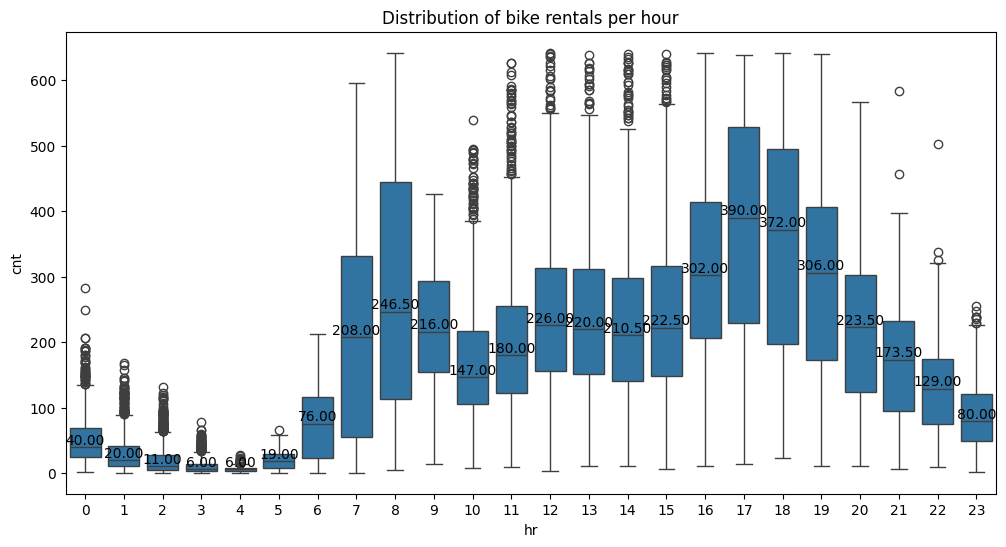

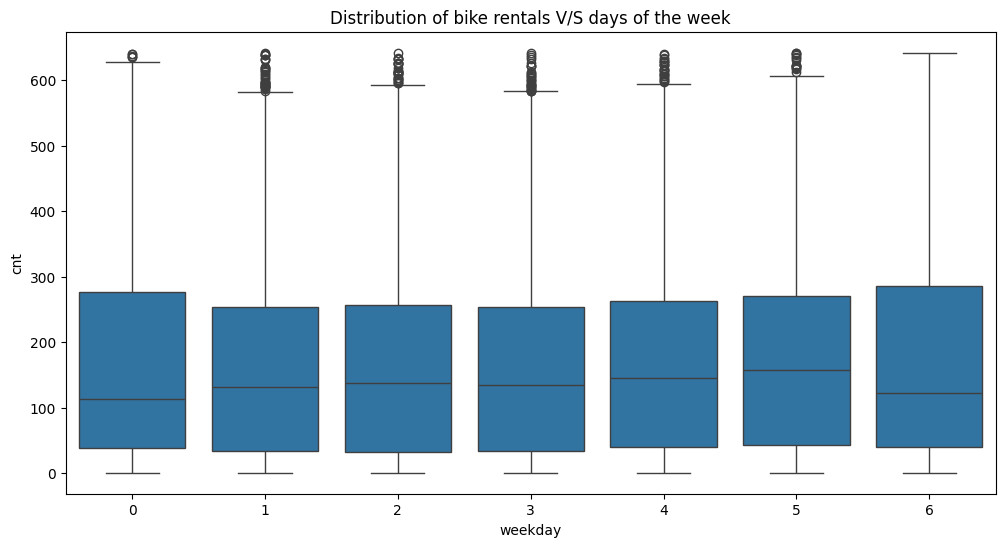

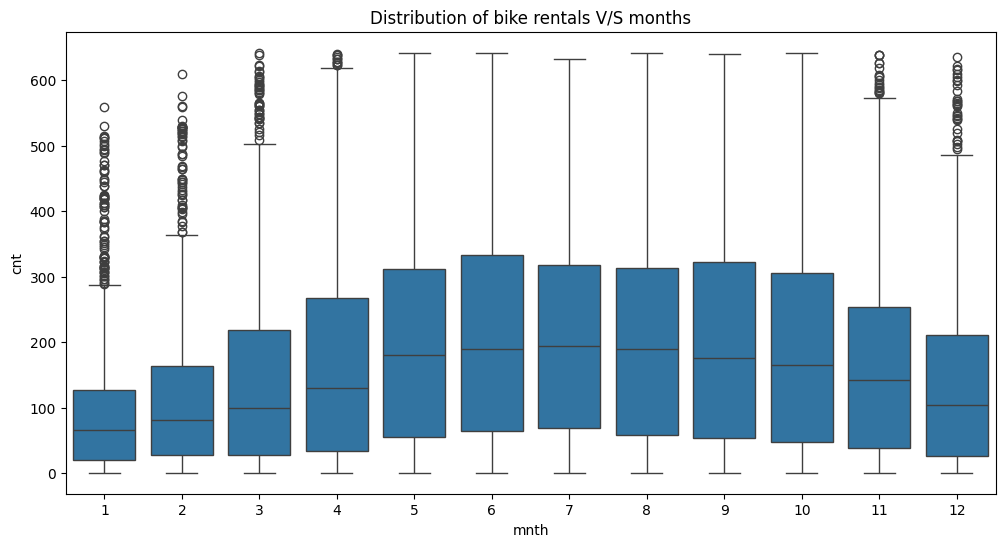

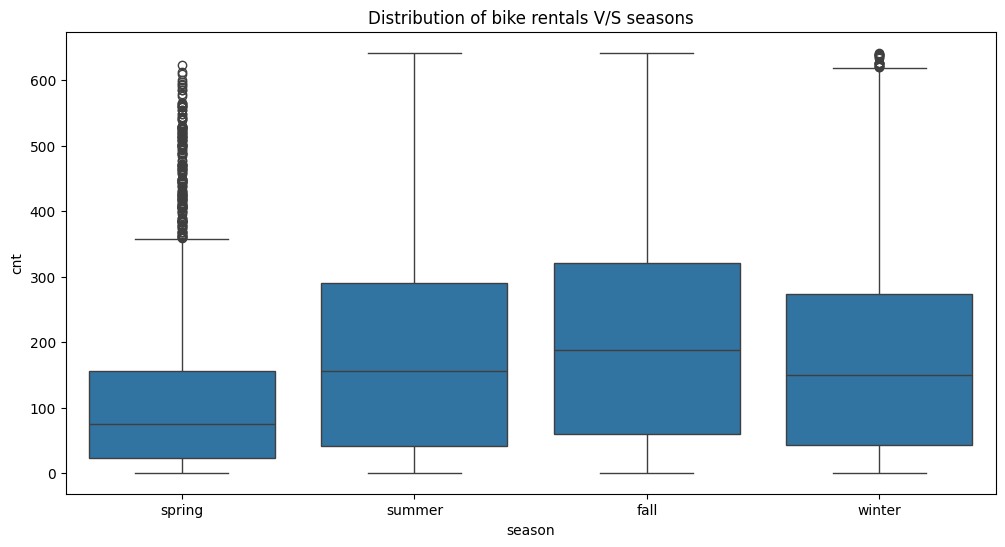

In [19]:
#per hour
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hr', y='cnt', data=df)
plt.title('Distribution of bike rentals per hour')
medians = df.groupby('hr')['cnt'].median()
for x, y in enumerate(medians):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.show()

#per days of the week
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Distribution of bike rentals V/S days of the week')

#per month
plt.figure(figsize=(12,6))
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Distribution of bike rentals V/S months')
plt.show()

In [30]:
df.to_csv("read_data.csv", index=False)

## Conclusion

- Hari Libur: Jika penggunaan meningkat pada hari libur, promosi khusus atau peningkatan layanan pada hari-hari ini mungkin menarik bagi pengguna.
- Musim dan Cuaca: Musim panas atau cuaca cerah cenderung meningkatkan penggunaan. Strategi seperti penawaran khusus pada musim dingin atau hujan dapat mempertahankan tingkat penggunaan.